In [53]:
import pandas as pd
import numpy as np


In [54]:
data = pd.read_csv('data.csv')

In [55]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,31-Aug-2021,16947.50,17153.50,16915.85,17132.20,464390247,40147.89
1,01-Sep-2021,17185.60,17225.75,17055.05,17076.25,301894634,27691.93
2,02-Sep-2021,17095.40,17245.50,17059.70,17234.15,242377518,22620.36
3,03-Sep-2021,17262.45,17340.10,17212.20,17323.60,261373795,23579.17
4,06-Sep-2021,17399.35,17429.55,17345.55,17377.80,228045532,21270.62


In [56]:
data.drop(['Open', "High", 'Low', 'Shares Traded', 'Turnover (Rs. Cr)'], inplace = True, axis = 'columns')

In [57]:
data.head()

,Date,Close
0,31-Aug-2021,17132.20
1,01-Sep-2021,17076.25
2,02-Sep-2021,17234.15
3,03-Sep-2021,17323.60
4,06-Sep-2021,17377.80


In [58]:
data['Daily Change %'] = data['Close']

In [59]:
data.head()

,Date,Close,Daily Change %
0,31-Aug-2021,17132.20,17132.20
1,01-Sep-2021,17076.25,17076.25
2,02-Sep-2021,17234.15,17234.15
3,03-Sep-2021,17323.60,17323.60
4,06-Sep-2021,17377.80,17377.80


In [60]:
len(data['Close'])

248

In [61]:
data['Daily Change %'][1]

17076.25

In [91]:
for index in range(len(data['Close'])):
    if index == 0:
        data['Daily Change %'][index] = 0
    else:
        data['Daily Change %'][index] = round((((data['Close'][index]/data['Close'][index-1])-1) *100),2)

C:\Users\Epic\AppData\Local\Temp\ipykernel_12236\4166043372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Change %'][index] = 0
C:\Users\Epic\AppData\Local\Temp\ipykernel_12236\4166043372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Change %'][index] = round((((data['Close'][index]/data['Close'][index-1])-1) *100),2)


In [92]:
data.tail()

,Date,Close,Daily Change %
243,23-Aug-2022,17577.50,0.50
244,24-Aug-2022,17604.95,0.16
245,25-Aug-2022,17522.45,-0.47
246,26-Aug-2022,17558.90,0.21
247,29-Aug-2022,17312.90,-1.40


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


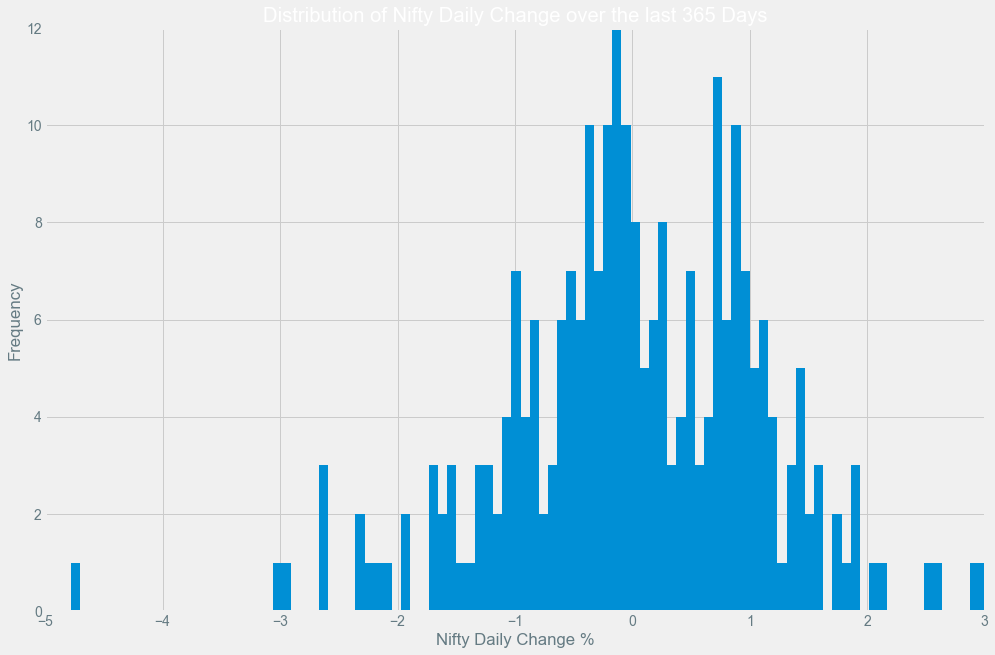

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
print(plt.style.available )
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,10))
ax.hist(data['Daily Change %'], bins=100, )
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_ylabel('Frequency')
ax.set_xlabel('Nifty Daily Change %')
ax.set_xlim(-5,3)
ax.set_ylim(0,12)
ax.set_title('Distribution of Nifty Daily Change over the last 365 Days')
plt.show()



In [140]:
fig.savefig('Nifty_histogram_fivethirtyeight.png')

-0.03

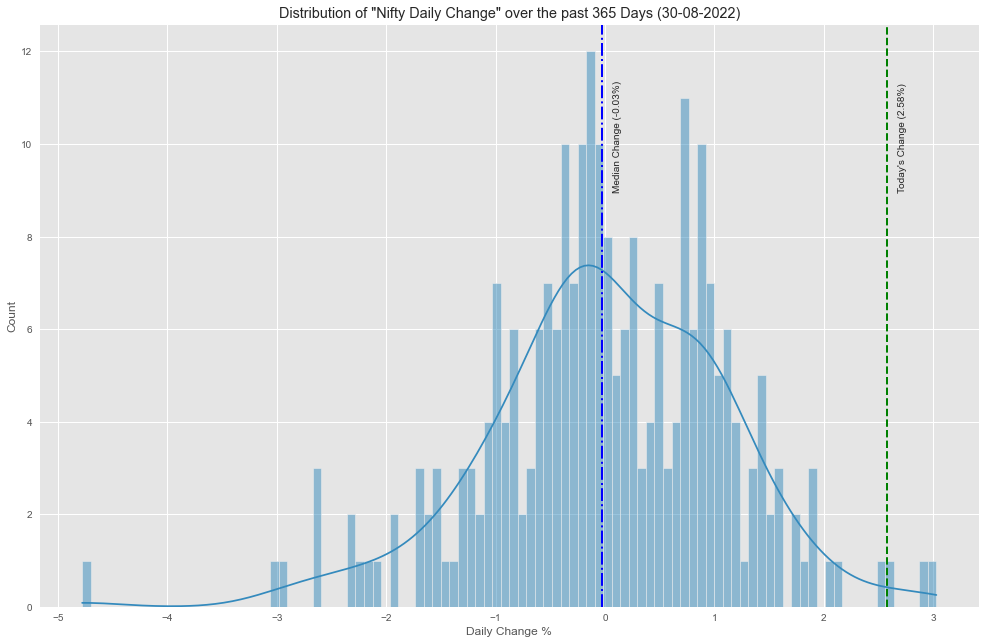

In [218]:
from cProfile import label
import seaborn as sns
fig, ax1 = plt.subplots(figsize = (15,10))
plt.style.use('ggplot')
ax1 = sns.histplot(data['Daily Change %'], kde=True, bins=100)
ax1.set_title('Distribution of "Nifty Daily Change" over the past 365 Days (30-08-2022)')

# Visualizing todays Change
todays_change = 2.58
plt.axvline(x =todays_change, ymin=0,ymax =5,color ='green', linewidth = 2,linestyle ="--" )
ax1.text(todays_change+0.1, 9, f"Today's Change ({todays_change}%)",rotation=90)

#Visualizing Median
median = data['Daily Change %'].median()
ax1.text(median +0.1, 9, f"Median Change ({median}%)",rotation=90)
plt.axvline(x =median, ymin=0,ymax =5,color ='blue', linewidth = 2,linestyle ="dashdot" )


# Other params for ax1.text() are color='r', ha='right', va='top', rotation=90,
plt.show()



In [186]:
fig.savefig('Nifty_ggplot.png')